## Salary Estimation Using K-Nearest Neighbour

* Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Load Dataset and summarize

In [29]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Data Science\Machine Learning\4_SalaryEstimator_K-NearestNeighbour\salary.csv')

print(df.shape)
print(df.head(5))
print(df.describe())

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
                age  education.num  capital.gain  hours.per.week
count  32561.000000   32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844       40.437456
std       13.640433       2.572720   7385.292085       12.347429
min       17.000000       1.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000       99.000000


* Mapping Salary Data to Binary

In [30]:
income_set=set(df['income'])

df['income']=df['income'].map({'<=50K':0,'>50K':1}).astype(int)

In [31]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


* Segregating Dataset

In [32]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [33]:
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [34]:
y

array([0, 0, 0, ..., 1, 0, 0])

* Splitting Dataset to Train and Test

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

* Feature Scalling

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

* Finding Best Fit line

Text(0, 0.5, 'Mean Error')

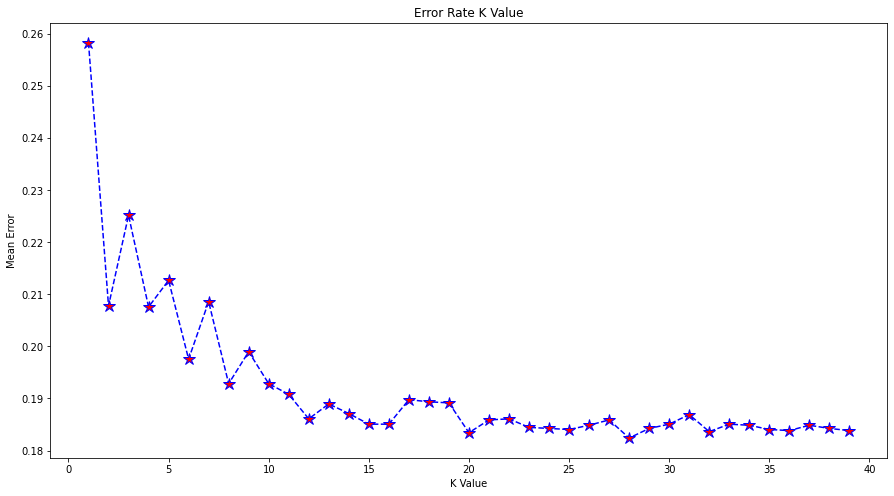

In [37]:
error=[]
from sklearn.neighbors import KNeighborsClassifier


# calculate error values between 1 to 40

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    i_pred=model.predict(X_test)
    
    error.append(np.mean(i_pred !=y_test))

plt.figure(figsize=(15,8))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='*',markerfacecolor='red',markersize='12')

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

* Training

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=28,metric='minkowski',p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

* Predicting ,new epmloyee's salary wheather he will get more than 50K or below 50K

In [39]:
age=int(input("Enter New epmloyee's Age:   "))
edu=int(input("Enter new employee's education number: "))
cap=int(input(" Enter new employee's Capital Gain:  "))
hour= int(input("Enter new employee's working hour per week:  "))

newEmp=[[age,edu,cap,hour]]
result=model.predict(sc.transform(newEmp))
print(result)

if result==1:
    print("new employee might got salary above 50K  ")
else:
    print("new employee might not get salary above 50K")
    

Enter New epmloyee's Age:   30
Enter new employee's education number: 12
 Enter new employee's Capital Gain:  0
Enter new employee's working hour per week:  20
[0]
new employee might not get salary above 50K


* Prediction for All dataset

In [40]:
y_pred=model.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


* Evaluation Model:- Confusion Matrix


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

print('Confusion Matrix: ')
print(cm)

print("Accuracy  of the model is : {}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix: 
[[3486  214]
 [ 677  508]]
Accuracy  of the model is : 81.76049129989764%
